# Setup

In [1]:
library(popsom)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
source('/home/ec2-user/SageMaker/popsom/R/map-utils.R')

Loading required package: som
Loading required package: class
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 


In [3]:
# a function that searches for the best model

library(popsom)

train.maps <- function(dataset, labels, xsize, ysize) {

    num_train <- c()
    convergs <- c()

    best_map <- NULL
    best_converg = 0
    best_train = 0
    best_timr = 0

    # find the best map
    for(i in seq(1,5))
    {
      for(i in list(10,100,1000,10000,50000,100000,200000,400000))
      {
        start_time = Sys.time()
        ms = map.build(dataset, 
                       labels = labels, 
                       xdim = xsize, 
                       ydim = ysize, 
                       alpha=0.6,
                       train = i,
                       algorithm="vsom")
        end_time = Sys.time()
        delta_time = end_time - start_time

        converg = map.convergence(ms)
        num_train = c(num_train,i)
        convergs = c(convergs,converg)
        #print(converg)
      
        if (converg > best_converg) {
            best_map = ms
            best_converg = converg
            best_train = i
            best_time = delta_time
        }
      }
    }

    # gather convergence data
    conv_data <- data.frame(num_train,convergs)
        
    list(data=conv_data, 
         map=best_map, 
         conv=best_converg, 
         train=best_train,
         time=best_time)
}

In [4]:
# plot convergence accuracy based on convergence data
library(ggplot2)

plot.convergence <- function (plot_data, name) {
    ggplot(plot_data,aes(x = log2(num_train), y = convergs)) +
        geom_point() +
        ylim(0,1)  +
        labs(title = paste(name,'Convergence Accuracy'),x= 'log2(Iterations)', y = 'Value') +
        stat_smooth(method = lm, formula = y ~ poly(x, 3)) +
        theme_bw() + theme(plot.title = element_text(hjust = 0.5))
}

In [5]:
# compute the number of clusters found on the map

n.clusters <- function(map) {
    
    heat <- compute.umat(results$map)
    centroids <- compute.centroids(map,heat)
    unique.centroids <- get.unique.centroids(map, centroids)
    length(unique.centroids$position.x)
}


In [68]:
# generate an index vector for sampling test data and its labels

data_label <- read.csv('dataset/sat_test_label.csv')
rows <- nrow(data_label)
ix <- sample(rows, as.integer(rows/100)*25)


# SOM with original data

In [7]:
data_label <- read.csv('dataset/sat_test_label.csv')
data <- read.csv('dataset/sat_test.csv')

In [8]:
data_label <- data.frame(data_label[ix,])
data <- data[ix,]

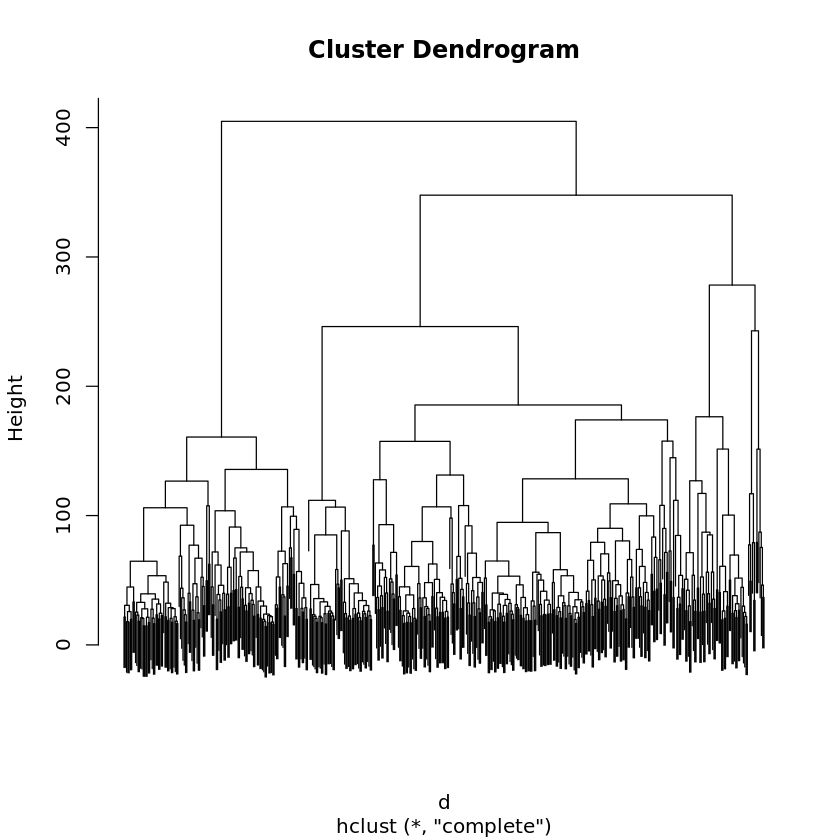

In [9]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [10]:
results = train.maps(data,data_label,25,20)

In [11]:
results$time

Time difference of 5.531386 secs

In [12]:
results$conv

[1] 0.95

In [13]:
n.clusters(results$map)

[1] 31

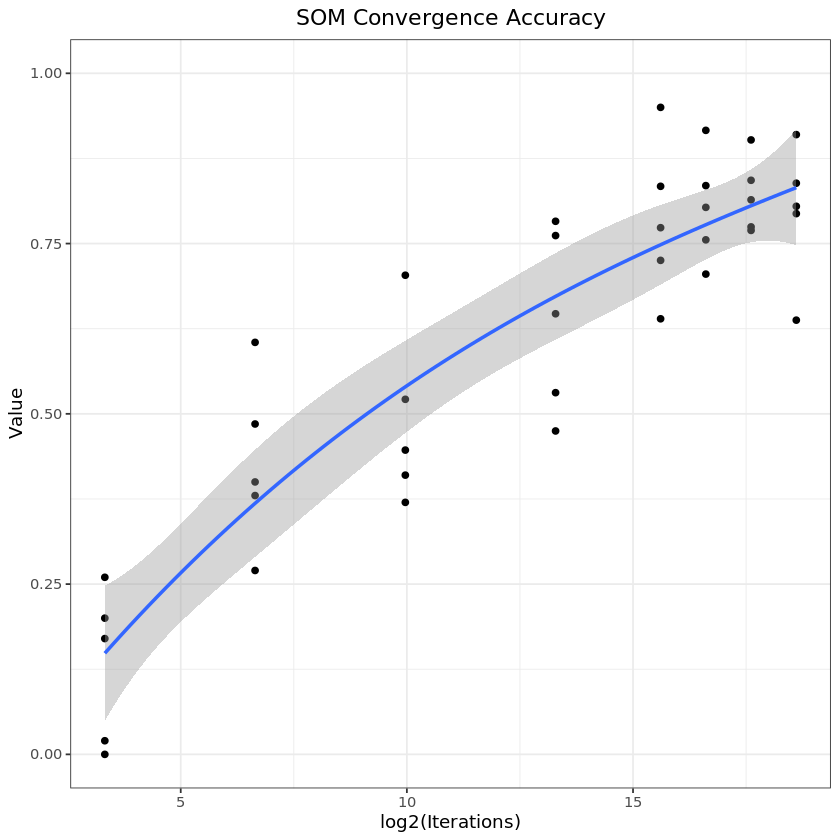

In [14]:
plot.convergence(results$data, 'SOM')

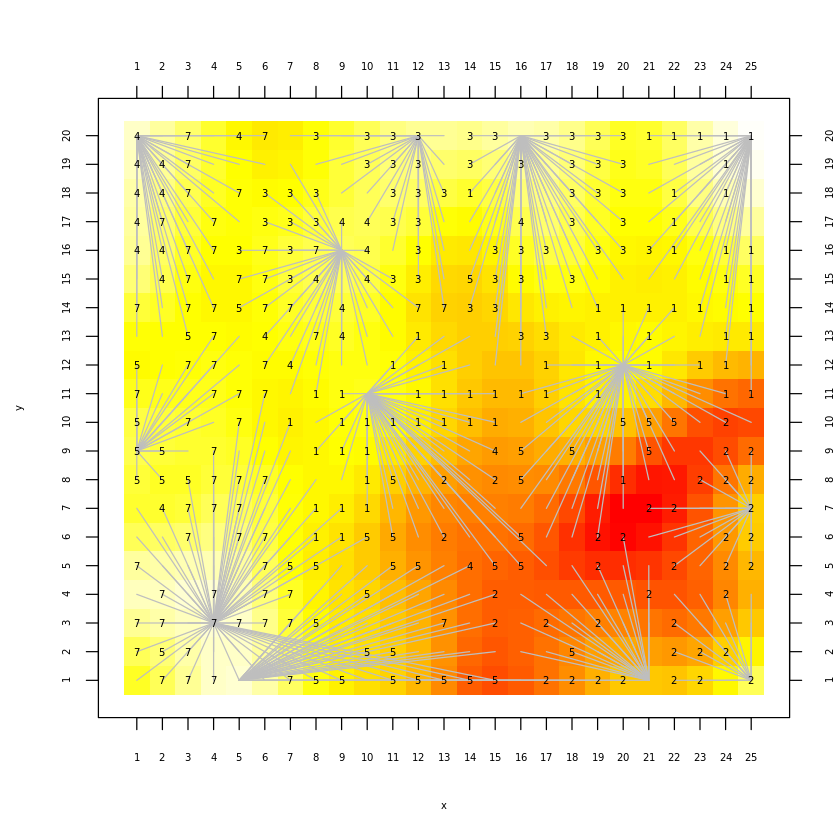

In [23]:
map.starburst(results$map)

# Basic Autoencoder

In [69]:
data_label <- read.csv('dataset/sat_test_label.csv')
data <- read.csv('output/sat_AE_encoded.csv')

In [70]:
data_label <- data.frame(data_label[ix,])
data <- data[ix,]

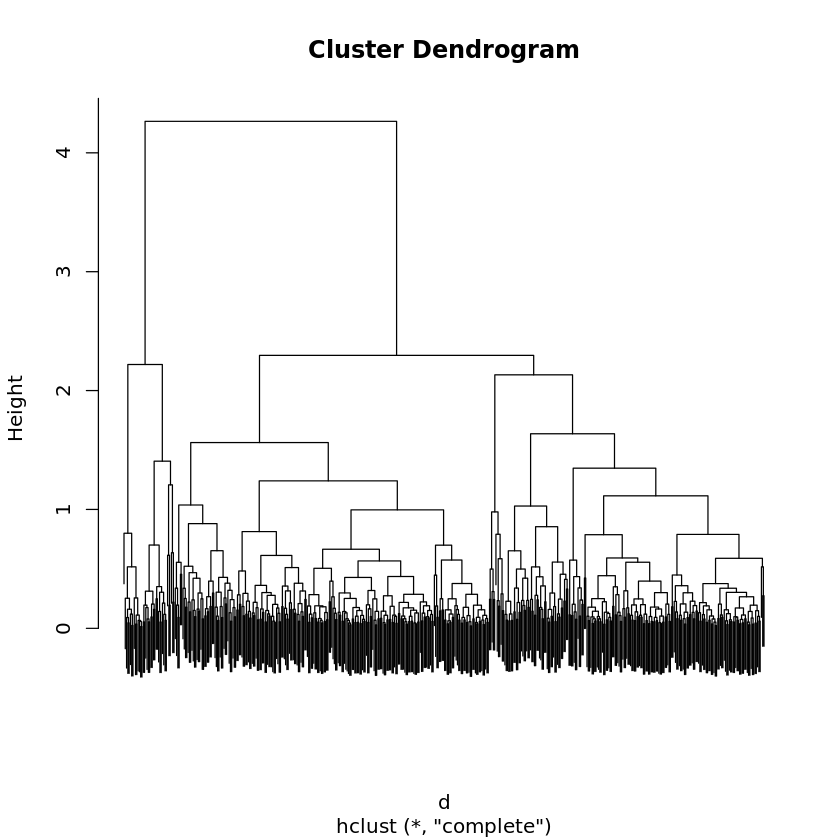

In [71]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [72]:
results = train.maps(data,data_label,25,20)

In [73]:
results$time

Time difference of 1.337716 secs

In [74]:
results$train

[1] 1e+05

In [75]:
results$conv

[1] 0.94

In [76]:
n.clusters(results$map)

[1] 29

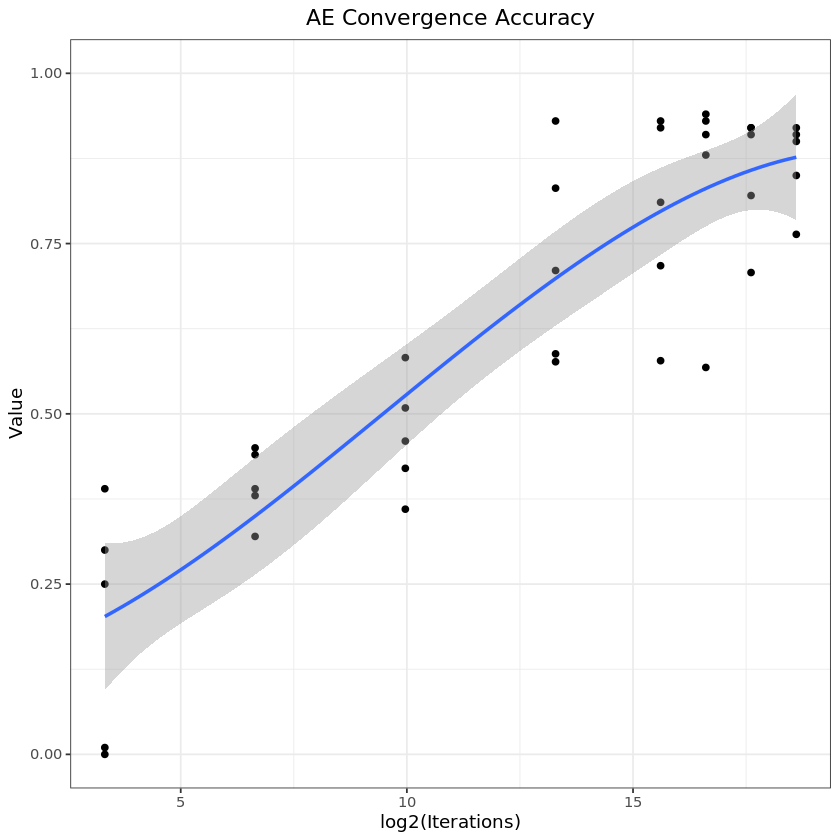

In [77]:
plot.convergence(results$data, 'AE')

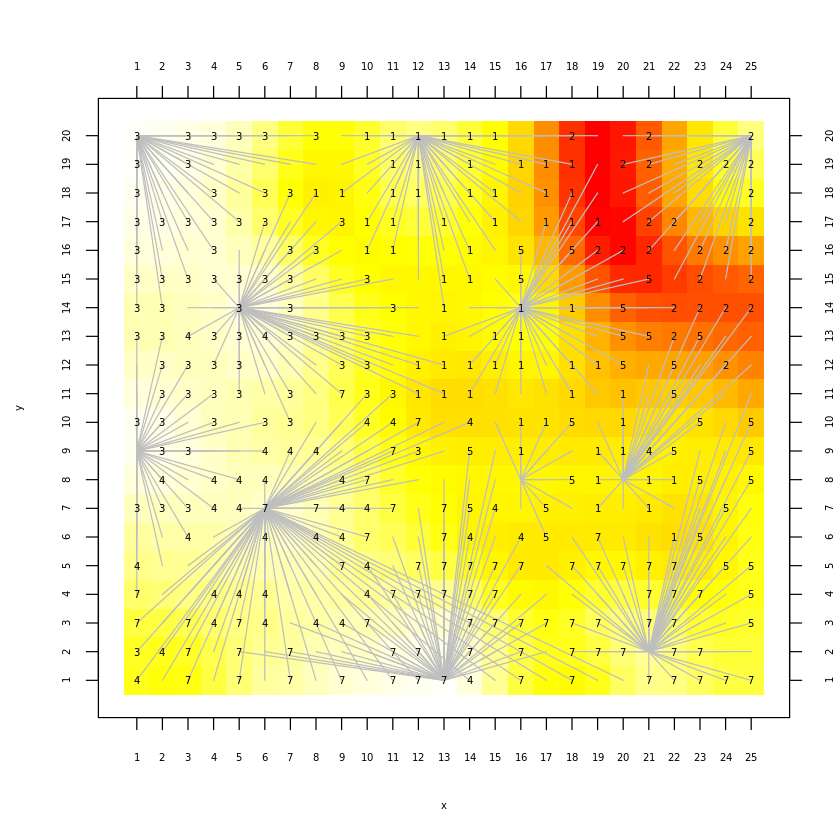

In [78]:
map.starburst(results$map)

# Sparse Autoencoder

In [79]:
data_label <- read.csv('dataset/sat_test_label.csv')
data <- read.csv('output/sat_SAE_encoded.csv')

In [80]:
data_label <- data.frame(data_label[ix,])
data <- data[ix,]

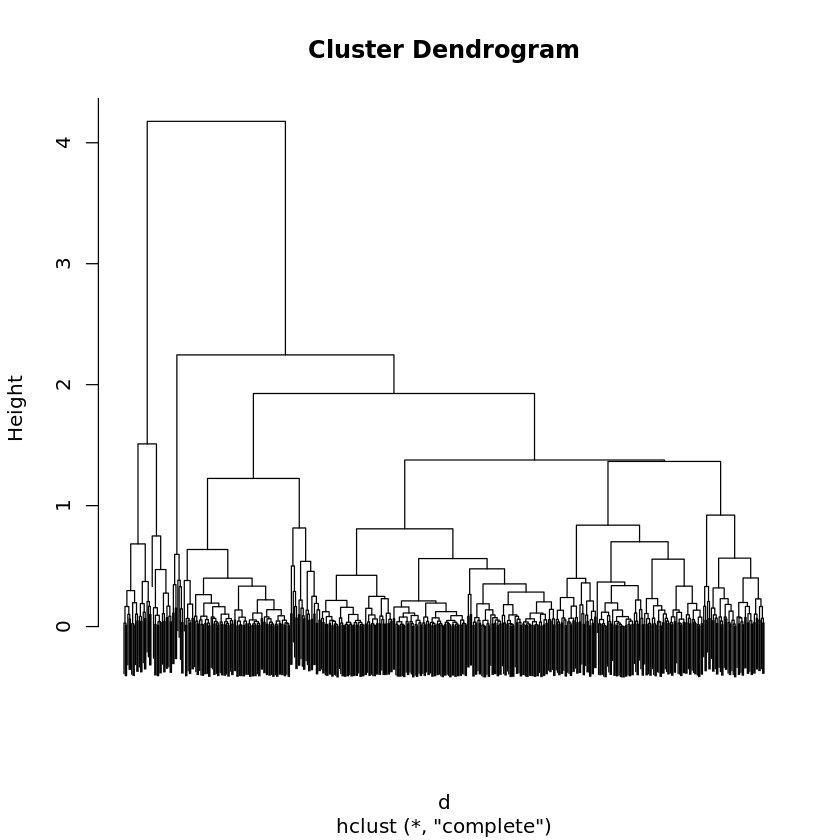

In [81]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [82]:
results = train.maps(data,data_label,25,20)

In [83]:
results$time

Time difference of 1.511003 secs

In [84]:
results$train

[1] 4e+05

In [85]:
results$conv

[1] 0.99

In [86]:
n.clusters(results$map)

[1] 27

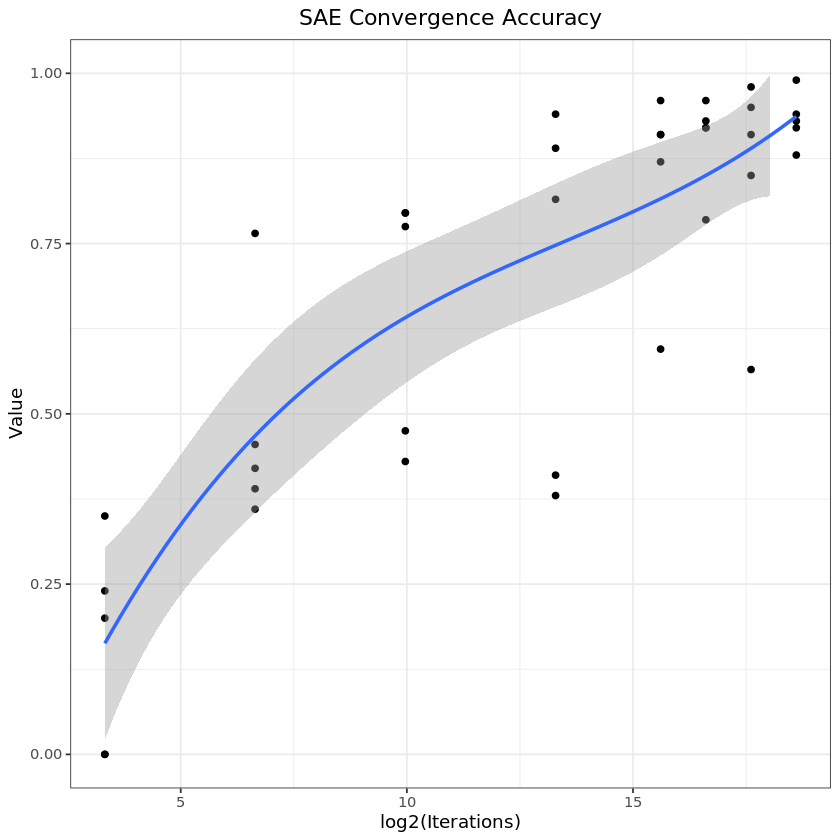

In [87]:
plot.convergence(results$data, 'SAE')

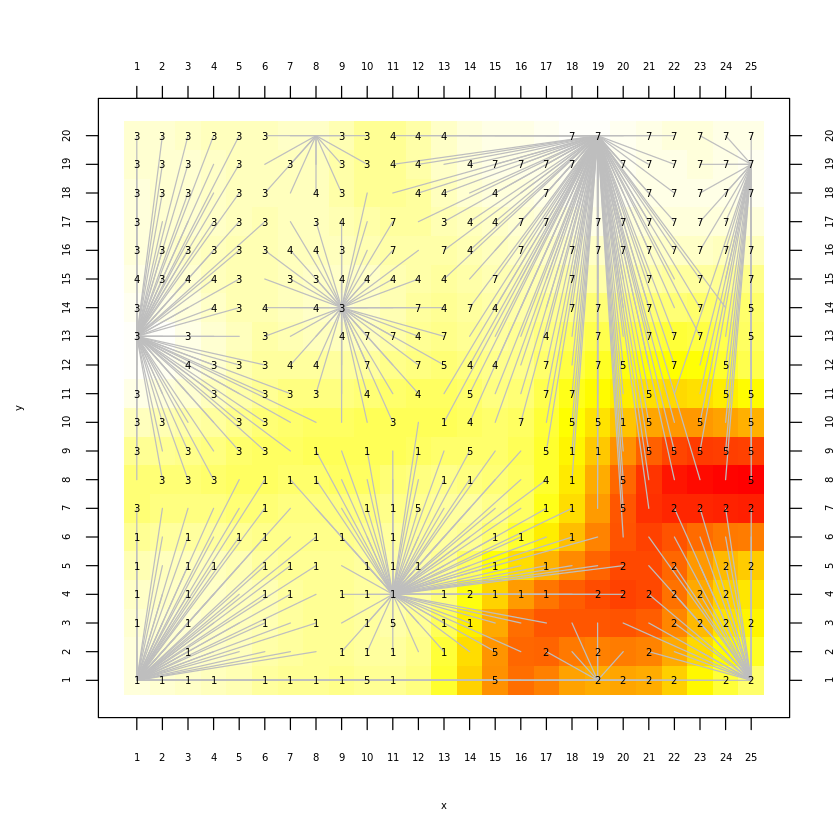

In [88]:
map.starburst(results$map)

# Contractive Autoencoder

In [89]:
data_label <- read.csv('dataset/sat_test_label.csv')
data <- read.csv('output/sat_CAE_encoded.csv')

In [90]:
data_label <- data.frame(data_label[ix,])
data <- data[ix,]

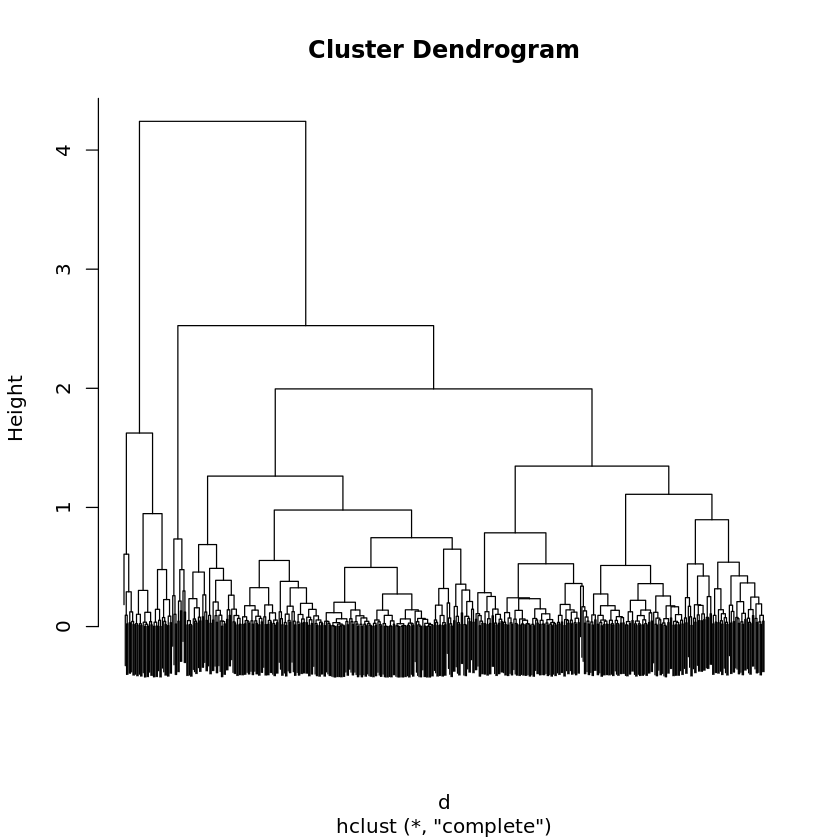

In [91]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [92]:
results = train.maps(data,data_label,25,20)

In [93]:
results$time

Time difference of 1.026231 secs

In [94]:
results$train

[1] 2e+05

In [95]:
results$conv

[1] 0.97

In [96]:
n.clusters(results$map)

[1] 29

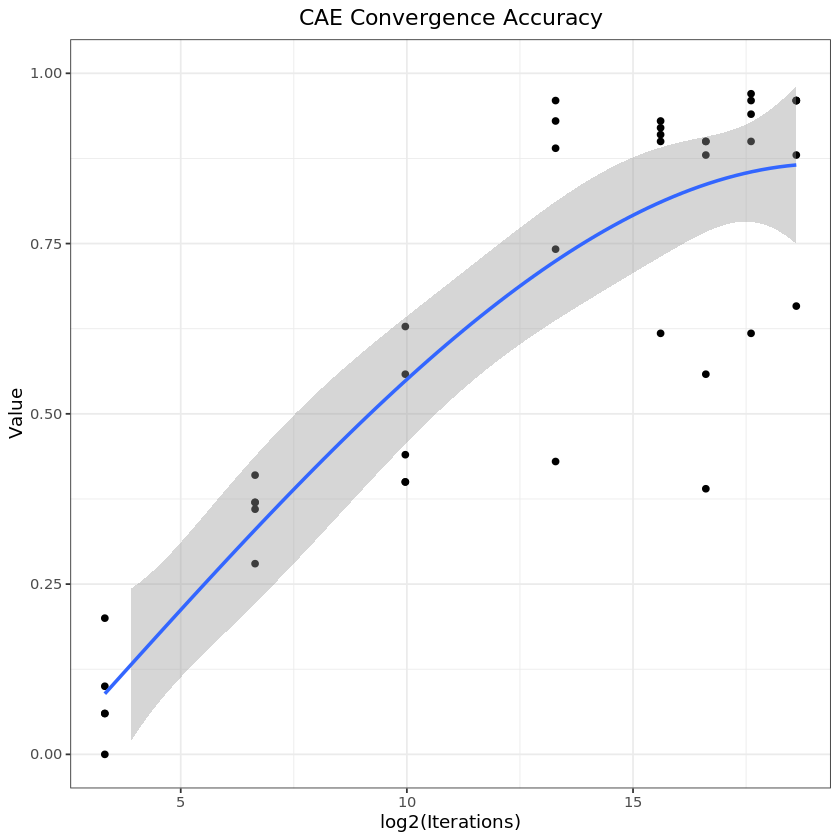

In [97]:
plot.convergence(results$data, 'CAE')

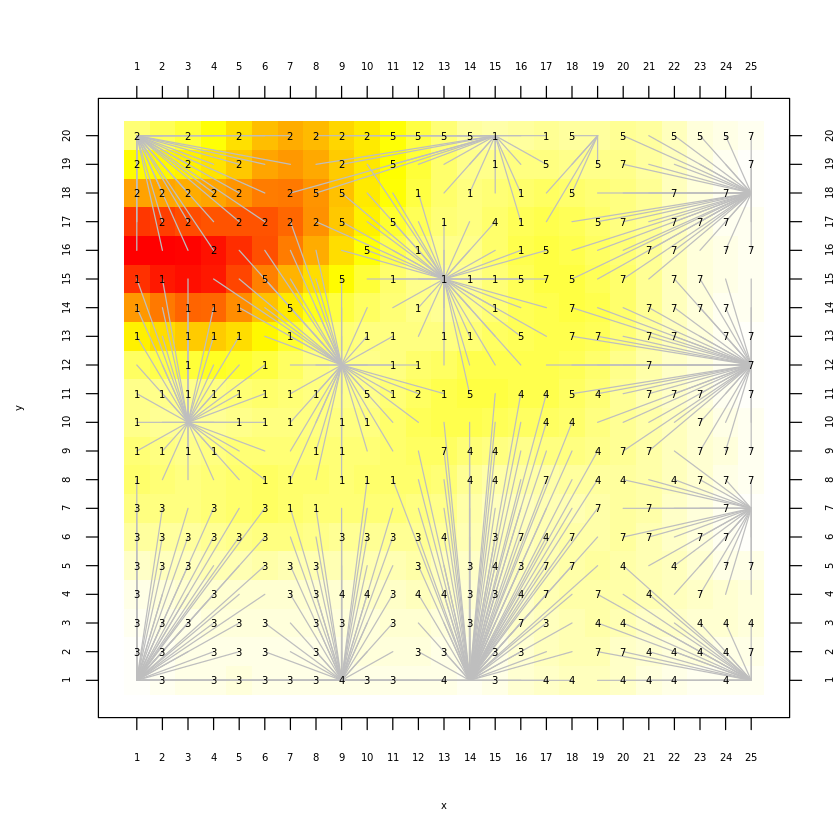

In [98]:
map.starburst(results$map)

# Denoising Autoencoder

In [99]:
data_label <- read.csv('dataset/sat_test_label.csv')
data <- read.csv('output/sat_DAE_encoded.csv')

In [100]:
data_label <- data.frame(data_label[ix,])
data <- data[ix,]

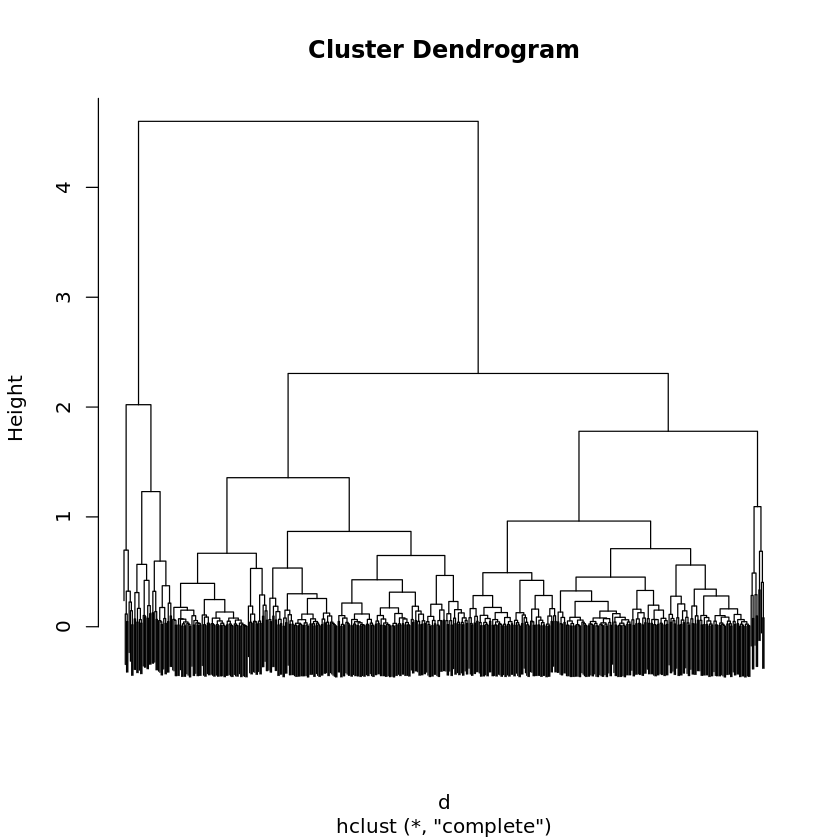

In [101]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [102]:
results = train.maps(data,data_label,25,20)

In [103]:
results$time

Time difference of 2.067937 secs

In [104]:
results$train

[1] 4e+05

In [105]:
results$conv

[1] 0.98

In [106]:
n.clusters(results$map)

[1] 27

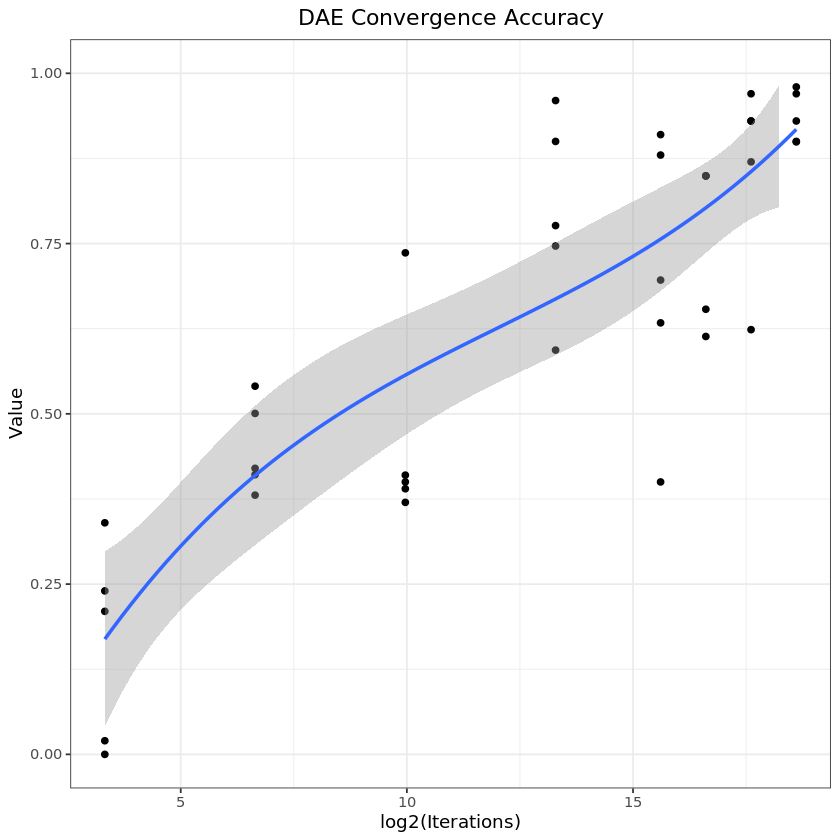

In [107]:
plot.convergence(results$data, 'DAE')

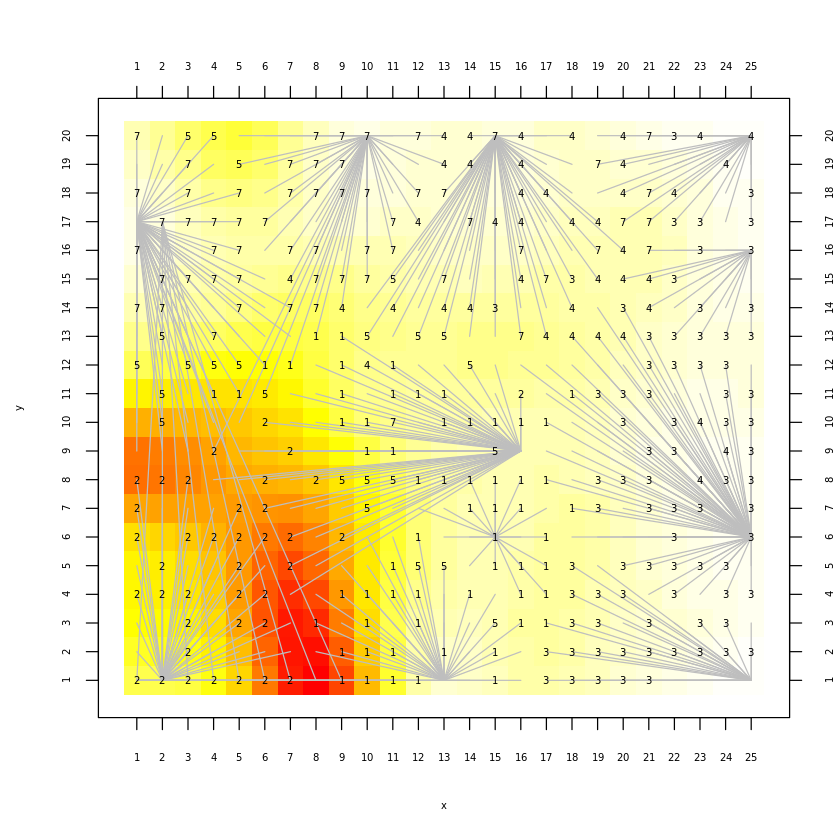

In [108]:
map.starburst(results$map)

# Convolutional Autoencoder

In [109]:
data_label <- read.csv('dataset/sat_test_label.csv')
data <- read.csv('output/sat_ConAE_encoded.csv')

In [110]:
data_label <- data.frame(data_label[ix,])
data <- data[ix,]

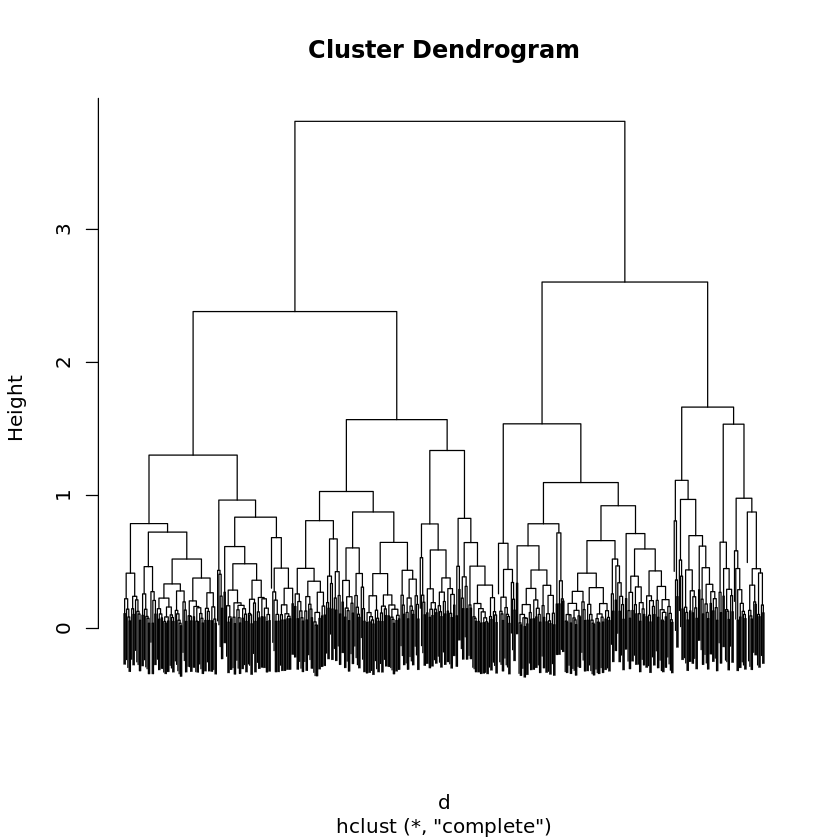

In [111]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [112]:
results = train.maps(data,data_label,25,20)

In [113]:
results$time

Time difference of 2.823556 secs

In [114]:
results$train

[1] 4e+05

In [115]:
results$conv

[1] 0.96

In [116]:
n.clusters(results$map)

[1] 32

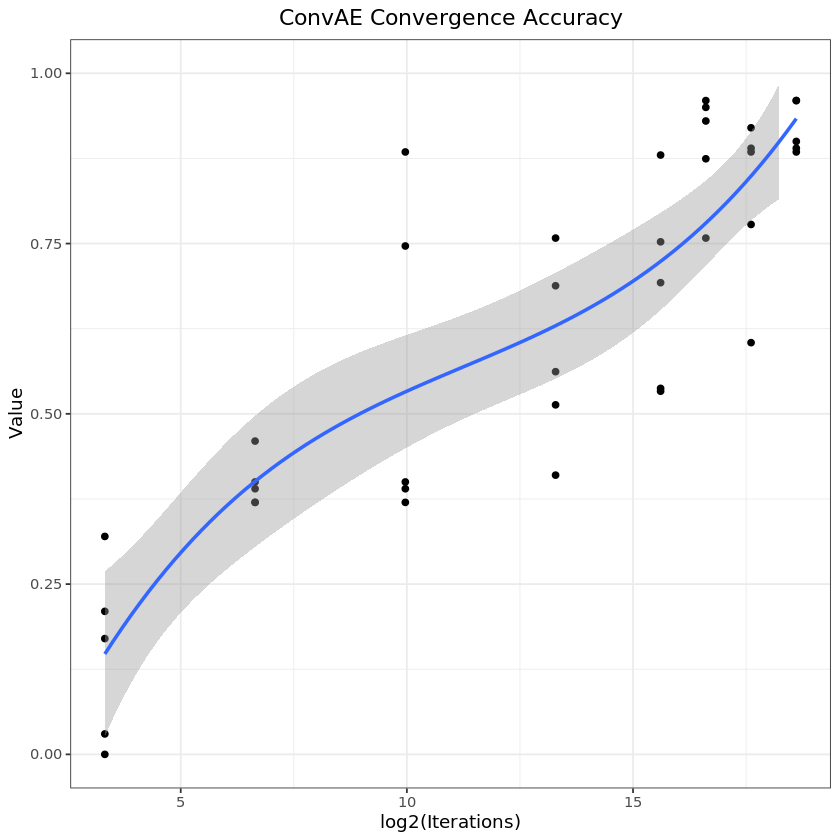

In [117]:
plot.convergence(results$data, 'ConvAE')

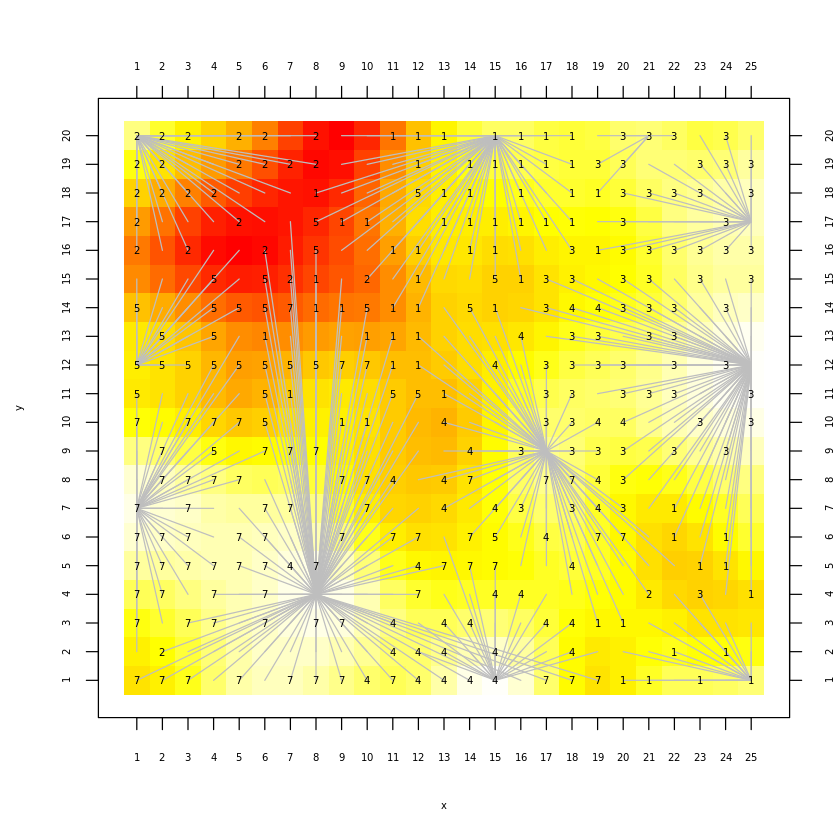

In [118]:
map.starburst(results$map)